# Árboles de Regresión

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [5]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)
regtree.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [20]:
preds = regtree.predict(data[predictors])

In [21]:
data["preds"] = preds

In [22]:
data[["preds", "medv"]]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
5,23.787500,28.7
6,21.863636,22.9
7,20.020833,27.1
8,20.020833,16.5
9,20.020833,18.9


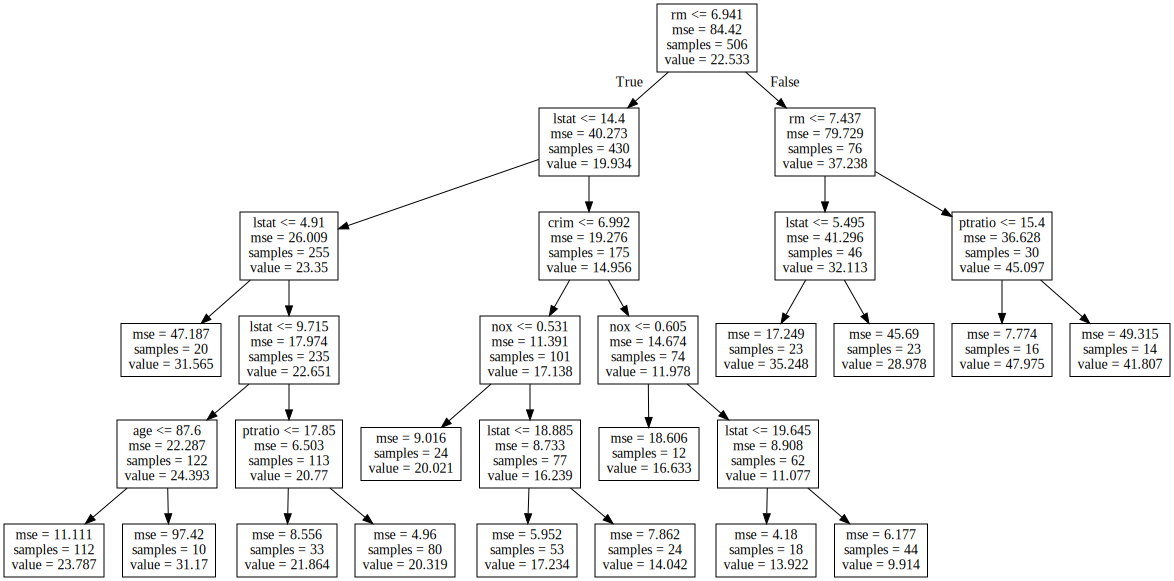

In [23]:
from sklearn.tree import export_graphviz
with open("resources/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
import os
from graphviz import Source

file = open("resources/boston_rtree.dot", "r")
text = file.read()
Source(text)

In [14]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [24]:
cv = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring="mean_squared_error", cv=cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[-14.21501779 -16.62018743 -18.48312343 -46.22608214 -10.25202434
 -18.39546877 -15.08005674 -32.23929702 -23.04375075 -10.93761052]
-20.54926189262014


In [25]:
regtree.feature_importances_

array([0.03218453, 0.        , 0.        , 0.        , 0.01619533,
       0.63418762, 0.01416527, 0.        , 0.        , 0.        ,
       0.00962046, 0.        , 0.29364679])

In [26]:
list(zip(predictors, regtree.feature_importances_))

[('crim', 0.032184533425691254),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.016195328299152056),
 ('rm', 0.6341876193016562),
 ('age', 0.014165271650613091),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('ptratio', 0.009620458196377114),
 ('black', 0.0),
 ('lstat', 0.2936467891265104)]

## Random Forests

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10000)
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=2,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [47]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred","medv"]].head()

,rforest_pred,medv
0,28.467618,24.0
1,22.676603,21.6
2,34.481014,34.7
3,34.817878,33.4
4,34.356018,36.2


In [45]:
data["rforest_error2"] = (data["rforest_pred"]-data["medv"])**2
sum(data["rforest_error2"])/len(data)

10.15139739971286

In [46]:
forest.oob_score_ #Similar al R2 de la regresión lineal

0.8797506423637901